# Datos descargados de: https://www.pmel.noaa.gov/tao/drupal/disdel/



---


# ALTURA DINÁMICA DE LA BOYA UBICADA EN 0°N - 170°W

---

In [30]:
# Conectando google drive con colab:
#-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
#-------------------------------------
import os
path = '/content/drive/MyDrive/Colab Notebooks/OCEANOGRAFIA/BOYA 0N170W/' # Ruta del directorio de trabajo
os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [31]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
alt_din = xr.open_dataset(path + 'dyn0n170w_dy.cdf',drop_variables=['QD_5013'])
alt_din['time'] = pd.date_range('1992-03-08', '2023-07-10', freq = 'D')
# Elimina las dimensiones que no deseas (lat y lon)
alt_din = alt_din.sel(lat=alt_din.lat, lon=alt_din.lon, method='nearest')
alt_din = alt_din.squeeze(drop=True)
alt_din

<xarray.Dataset>
Dimensions:  (time: 11447)
Coordinates:
  * time     (time) datetime64[ns] 1992-03-08 1992-03-09 ... 2023-07-10
Data variables:
    DYN_13   (time) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                07:45 12-JUL-2023

In [33]:
# Calculamos el promedio histórico (climatología) y pasamos a dataframe:
alt_din_prom = alt_din.sel(time=slice('1991-01-01', '2020-12-31')).groupby('time.dayofyear').mean(dim='time')
df_clim = alt_din_prom.to_dataframe().drop(366, axis=0).reset_index().drop(['dayofyear'],axis=1)
df_clim = df_clim.rename(columns={'DYN_13':'DYN_13_clim'})
df_clim_dup = np.tile(df_clim['DYN_13_clim'], 2) # Duplicamos
df_clim_dup = pd.DataFrame({'DYN_13_clim': df_clim_dup})
df_clim_dup

,DYN_13_clim
0,126.947510
1,128.178040
2,128.163864
3,128.182404
4,128.610596
...,...
725,126.973732
726,127.161102
727,126.789230
728,126.888115


In [34]:
round(df_clim.describe().loc[['max', 'min', 'mean', 'std']],2)

,DYN_13_clim
max,128.82
min,122.43
mean,124.88
std,1.65


In [35]:
dfs = []
years = [1997,1998,2010,2011,2022,2023] # Elegimos los años a analizar
for year in years:
  alt_din_year = alt_din.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
  df_year = alt_din_year.to_dataframe().reset_index().drop(['time'],axis=1)
  df_year = df_year.rename(columns={'DYN_13':f'DYN_13_{year}'})
  dfs.append(df_year)
# Combinar todos los dataframes en uno solo
df = pd.concat(dfs, axis=1)
df

,DYN_13_1997,DYN_13_1998,DYN_13_2010,DYN_13_2011,DYN_13_2022,DYN_13_2023
0,132.148178,115.058418,135.131775,118.908501,131.048065,127.431900
1,132.872696,115.769264,133.502090,118.926613,131.928497,127.543076
2,132.404068,116.094154,133.789215,117.171173,132.843262,127.708931
3,132.510101,116.828339,134.553375,116.591965,134.910370,127.656998
4,139.628281,115.789810,133.915497,119.181915,132.099976,128.298965
...,...,...,...,...,...,...
360,116.438652,116.486198,119.048958,NaN,127.941132,NaN
361,117.216179,118.682465,120.336464,NaN,127.989906,NaN
362,117.268799,118.132973,117.402885,NaN,127.078690,NaN
363,116.796768,116.365875,117.390739,NaN,127.073059,NaN


In [36]:
round(df.describe().loc[['max', 'min', 'mean', 'std']],2)

,DYN_13_1997,DYN_13_1998,DYN_13_2010,DYN_13_2011,DYN_13_2022,DYN_13_2023
max,148.82,122.29,146.53,129.33,135.36,138.99
min,114.47,98.29,105.51,116.59,113.33,120.84
mean,131.72,109.99,119.24,123.78,124.12,131.31
std,6.95,4.36,8.42,2.73,4.48,3.54


In [37]:
# Crear una lista para almacenar los resultados
dfss = pd.DataFrame()
# Iterar sobre los años y realizar la concatenación correspondiente
for i in range(0, len(years), 2):
    col1 = 'DYN_13_' + str(years[i])
    col2 = 'DYN_13_' + str(years[i+1])
    combined_col_name = col1 + '-' + str(years[i+1])
    result = pd.concat([df[col1], df[col2]]).reset_index(drop=True)
    dfss[combined_col_name] = result
dfss.insert(loc=0, column='DYN_13_clim', value=df_clim_dup)
dfss

,DYN_13_clim,DYN_13_1997-1998,DYN_13_2010-2011,DYN_13_2022-2023
0,126.947510,132.148178,135.131775,131.048065
1,128.178040,132.872696,133.502090,131.928497
2,128.163864,132.404068,133.789215,132.843262
3,128.182404,132.510101,134.553375,134.910370
4,128.610596,139.628281,133.915497,132.099976
...,...,...,...,...
725,126.973732,116.486198,NaN,NaN
726,127.161102,118.682465,NaN,NaN
727,126.789230,118.132973,NaN,NaN
728,126.888115,116.365875,NaN,NaN


In [38]:
import matplotlib.dates as mdates
def AltDin_vs_year(data,year):
  fig, ax = plt.subplots(figsize=(7,3))
  barras = ax.bar(data.index,data.DYN_13_clim, color ='cornflowerblue', label = 'Prom. Histórico',zorder = 10,width = 1, alpha = 0.85)
  barras = ax.plot(data.index,data[data.columns[i]],color ='tomato', alpha = 1, label = f'Año: {year}',zorder = 10,linewidth=0.8)

  ax.set_ylabel('Altura Dinámica [cm]',  style="oblique",fontsize=10)
  # Ajustar el rango del eje Y
  ax.set_ylim(95, 150)
  ax.set_yticks(range(95, 151, 5))

  #-----------------------------------------------------------------------------------------
    # ESTILO :V
  # Agregar el nombre del mes al título
  ax.set_title(f'Altura Dinámica: Histórico (1991-2020) vs {year}\nBoya: 0°N-170°W',  style="oblique", fontsize=10, color = 'black')

  ax.xaxis.label.set_color('black')
  ax.yaxis.label.set_color('black')
  ax.tick_params(colors='black')
  ax.grid(linewidth=1, color='gainsboro', linestyle='--',alpha=0.5)

  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  plt.axvline(x=365,color ='crimson', linestyle='--',linewidth=1,zorder = 10)
  plt.xticks(rotation=45)
  plt.xticks(style="oblique", fontsize=8)
  plt.yticks(style="oblique", fontsize=8)
  ax.legend(prop={'style': 'oblique'},loc='best', fontsize=10, labelcolor='black')

  plt.text(0, -0.20, 'Fuente de datos: NOAA [TAO/TRITON]',  style="oblique", fontsize=8, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  #-----------------------------------------------------------------------------------------
  # ax.legend(loc='best', bbox_to_anchor=(1, 0.15), fontsize=11, labelcolor='black')
  fig.savefig(path + f'AltDin_histVS{year}.jpg',
                  transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  plt.show()
  plt.close()

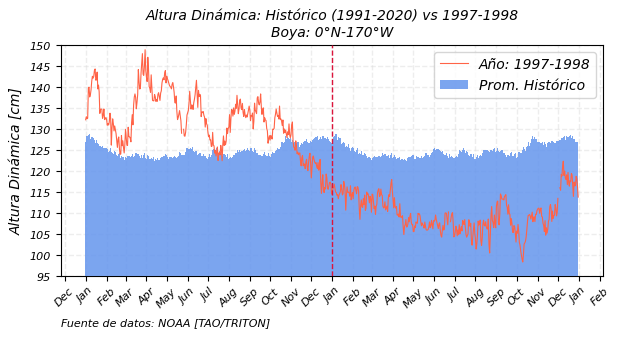

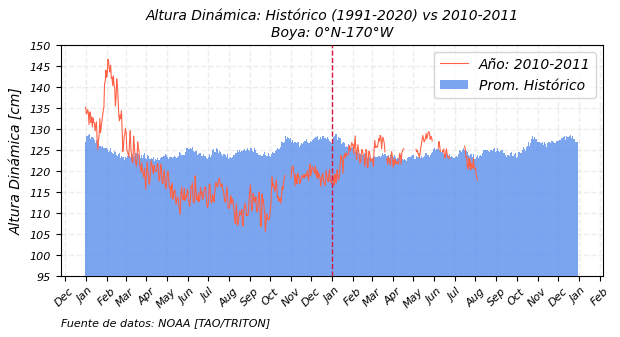

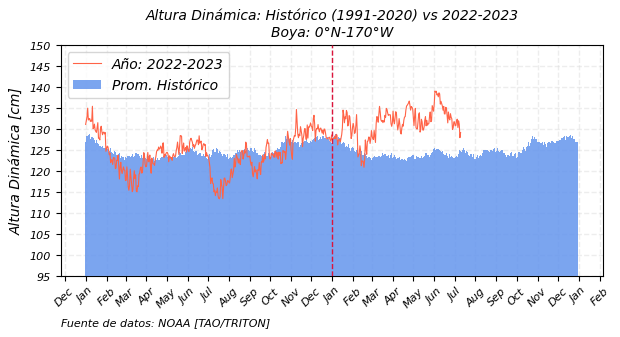

In [39]:
for i in range(1,len(dfss.columns)):
  AltDin_vs_year(dfss,dfss.columns[i].split("DYN_13_")[1])

 # ANOMALÍAS:

In [40]:
alt_din_prom = alt_din.sel(time=slice('1991-01-01', '2020-12-31')).groupby('time.dayofyear').mean(dim='time')
alt_din_anom = alt_din.groupby('time.dayofyear') - alt_din_prom
alt_din_anom

<xarray.Dataset>
Dimensions:    (time: 11447)
Coordinates:
  * time       (time) datetime64[ns] 1992-03-08 1992-03-09 ... 2023-07-10
    dayofyear  (time) int64 68 69 70 71 72 73 74 ... 185 186 187 188 189 190 191
Data variables:
    DYN_13     (time) float32 -2.943 -3.782 -2.128 -2.028 ... 6.246 2.764 4.499

In [41]:
dfs_anom = []
for year in years:
  alt_din_year_anom = alt_din_anom.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
  df_year_anom = alt_din_year_anom.to_dataframe().reset_index().drop(['time','dayofyear'],axis=1)
  df_year_anom = df_year_anom.rename(columns={'DYN_13':f'DYN_13_Anom_{year}'})
  dfs_anom.append(df_year_anom)
# Combinar todos los dataframes en uno solo
df_Anom = pd.concat(dfs_anom, axis=1)
df_Anom

,DYN_13_Anom_1997,DYN_13_Anom_1998,DYN_13_Anom_2010,DYN_13_Anom_2011,DYN_13_Anom_2022,DYN_13_Anom_2023
0,5.200668,-11.889091,8.184265,-8.039009,4.100555,0.484390
1,4.694656,-12.408775,5.324051,-9.251427,3.750458,-0.634964
2,4.240204,-12.069710,5.625351,-10.992691,4.679398,-0.454933
3,4.327698,-11.354065,6.370972,-11.590439,6.727966,-0.525406
4,11.017685,-12.820786,5.304901,-9.428680,3.489380,-0.311630
...,...,...,...,...,...,...
360,-10.535080,-10.487534,-7.924774,NaN,0.967400,NaN
361,-9.944923,-8.478638,-6.824638,NaN,0.828804,NaN
362,-9.520432,-8.656258,-9.386345,NaN,0.289459,NaN
363,-10.091347,-10.522240,-9.497375,NaN,0.184944,NaN


In [42]:
round(df_Anom.describe().loc[['max', 'min', 'mean', 'std']],2)

,DYN_13_Anom_1997,DYN_13_Anom_1998,DYN_13_Anom_2010,DYN_13_Anom_2011,DYN_13_Anom_2022,DYN_13_Anom_2023
max,24.83,-5.78,21.72,5.52,7.91,13.81
min,-13.73,-26.78,-18.14,-11.70,-11.37,-3.58
mean,6.83,-14.88,-5.58,-0.51,-0.76,7.07
std,7.82,3.94,8.26,3.52,3.64,4.00


In [43]:
dfss_Anom = pd.DataFrame()
# Iterar sobre los años y realizar la concatenación correspondiente
for i in range(0, len(years), 2):
    col1 = 'DYN_13_Anom_' + str(years[i])
    col2 = 'DYN_13_Anom_' + str(years[i+1])
    combined_col_name = col1 + '-' + str(years[i+1])
    result = pd.concat([df_Anom[col1], df_Anom[col2]]).reset_index(drop=True)
    dfss_Anom[combined_col_name] = result
dfss_Anom

,DYN_13_Anom_1997-1998,DYN_13_Anom_2010-2011,DYN_13_Anom_2022-2023
0,5.200668,8.184265,4.100555
1,4.694656,5.324051,3.750458
2,4.240204,5.625351,4.679398
3,4.327698,6.370972,6.727966
4,11.017685,5.304901,3.489380
...,...,...,...
725,-10.487534,NaN,NaN
726,-8.478638,NaN,NaN
727,-8.656258,NaN,NaN
728,-10.522240,NaN,NaN


In [47]:
def Anom_year(data,year):
  fig, ax = plt.subplots(figsize=(7,3))
  colores = np.where(data[data.columns[i]]>0, 'tomato', 'cornflowerblue')
  barras = ax.bar(data.index,data[data.columns[i]],color =colores, alpha = 1, label = f'Año: {year}',zorder = 10, width = 1)
  ax.set_ylabel('Anomalías [cm]',  style="oblique",fontsize=10)
  # #-----------------------------------------------------------------------------------------
    # ESTILO :V
  # Agregar el nombre del mes al título
  ax.set_title(f'Anomalía de Altura Dinámica, Año: {year}\nBoya: 0°N-170°W',  style="oblique", fontsize=10, color = 'black')

  ax.xaxis.label.set_color('black')
  ax.yaxis.label.set_color('black')
  ax.tick_params(colors='black')
  ax.grid(linewidth=1, color='silver', linestyle='--',alpha=0.5)
  ax.set_ylim(-30, 30)
  ax.set_yticks(range(-30, 40, 10))

  ax.xaxis.set_major_locator(mdates.MonthLocator())
  # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  plt.axvline(x=365,color ='crimson', linestyle='--',linewidth=1,zorder = 10)
  plt.xticks(rotation=45)
  plt.xticks(style="oblique", fontsize=8)
  plt.yticks(style="oblique", fontsize=8)

  plt.text(0, -0.20, 'Fuente de datos: NOAA [TAO/TRITON]',  style="oblique", fontsize=10, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  # #-----------------------------------------------------------------------------------------
  # # ax.legend(loc='best', bbox_to_anchor=(1.35, 0.11), fontsize=11, labelcolor='black')
  fig.savefig(path + f'AltDin_Anom{year}.jpg',
                  transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  plt.show()
  plt.close()

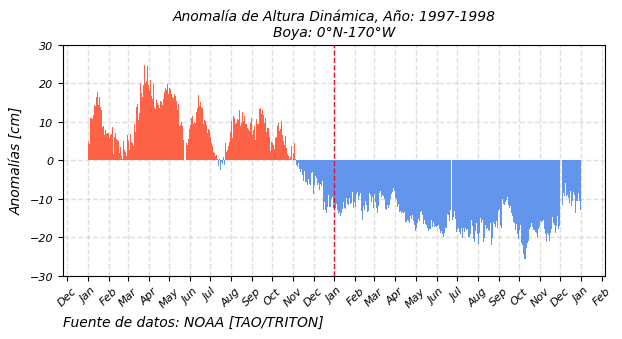

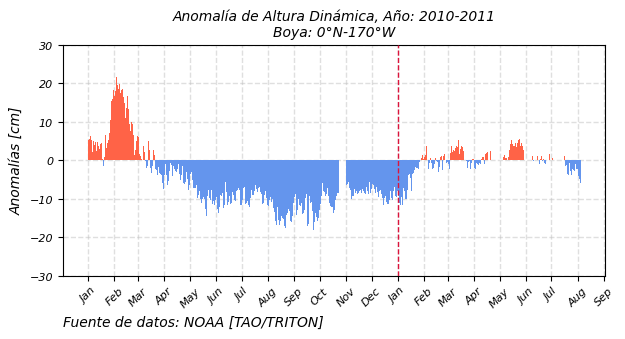

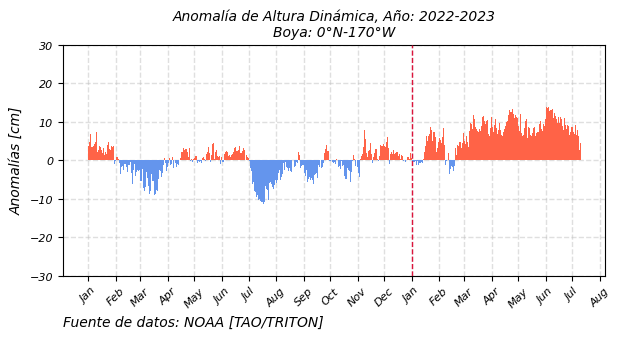

In [48]:
for i in range(0,len(dfss_Anom.columns)):
  Anom_year(dfss_Anom,dfss_Anom.columns[i].split("DYN_13_Anom_")[1])



---
# Los datos utilizados se encuentran en el siguiente link:
https://drive.google.com/drive/folders/1zo4Uq3XS9KKn_I2Ei1J_FiYu4QryQnNt



---